In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [4]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict)

2025-06-23 20:42:04 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


In [5]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [6]:
lonlat_dataset.run(**run_dict)

2025-06-23 20:42:05 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for 2t
2025-06-23 20:42:05 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-06-23 20:42:05 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-06-23 20:42:05 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-06-23 20:42:05 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-06-23 20:42:05 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-06-23 20:42:05 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-06-23 20:42:05 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-06-23 20:44:08 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-06-23 20:44:08 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-06-23 20:44:08 :: Regridder :: INFO     -> Grid name: lon-lat
2025-06-23 

In [7]:
lonlat_dataset

In [8]:
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

In [9]:
plot_dict = {'monthly_data': lonlat_dataset.monthly,
             'annual_data': lonlat_dataset.annual,
             'loglevel': 'INFO'}

/pfs/lustrep3/users/cadaumar/AQUA/src/aqua/graphics/lat_lon_profiles.py:72: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(fontsize='small')
/pfs/lustrep3/users/cadaumar/AQUA/src/aqua/graphics/lat_lon_profiles.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize='small')
2025-06-23 20:44:11 :: create_folder :: INFO     -> Folder ./png already exists
2025-06-23 20:44:12 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png
2025-06-23 20:44:12 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png


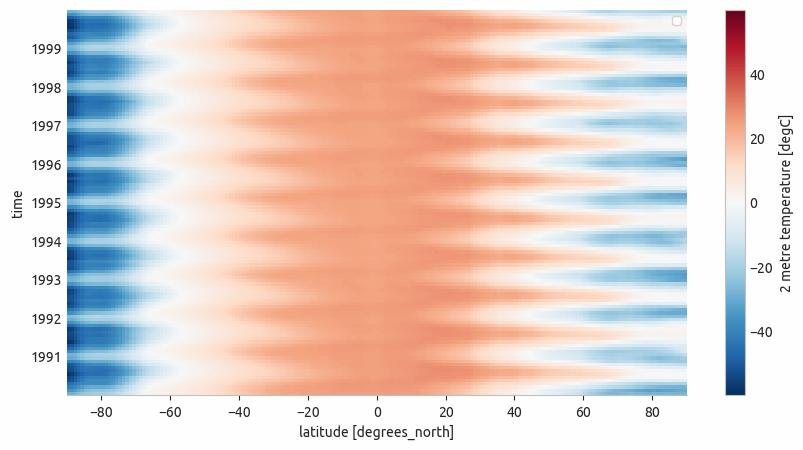

In [10]:
plot = PlotLatLonProfiles(**plot_dict)
data_labels = plot.set_data_labels()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_lat_lon_profiles(data_labels=data_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)